In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout

from network import HandModel
from process_data import get_data_set, get_num_batches


2025-07-18 19:18:52.218287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-18 19:18:52.231086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-18 19:18:52.235055: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-18 19:18:52.245636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = HandModel()
num_epochs = 20
dummy_input = tf.random.normal([1, 368, 368, 3])
_ = model(dummy_input)

# model.load_weights('good progress models/vgg19_pretrain_synth_dataset_epoch20_lr_custom_norm.h5')

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.0005,
    decay_steps=(get_num_batches() * num_epochs),  # total_epochs × steps_per_epoch
    alpha=0.0                  # Minimum LR is 0
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, epsilon=1e-8)

train_loss = tf.keras.metrics.Mean(name='train_loss')

train_data, val_data = get_data_set()
num_batches = get_num_batches()

I0000 00:00:1752891536.641017  312968 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1752891536.685538  312968 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1752891536.687852  312968 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1752891536.691299  312968 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [ ]:
for image, label in train_data.take(1):
    img_array = image.numpy()
    lbl = label.numpy()
    print(lbl[0][:, :, 0])

In [ ]:
model.feature_extraction.summary()

In [3]:
copy_model = tf.keras.applications.VGG19(False, input_shape=(368, 368, 3), pooling='avg')
copy_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 368, 368, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 368, 368, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 368, 368, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 184, 184, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 184, 184, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 184, 184, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 92, 92, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 92, 92, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 92, 92, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 92, 92, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 92, 92, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 46, 46, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 46, 46, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 46, 46, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 46, 46, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 23, 23, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 23, 23, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
for i in range(1, 16):
    print(copy_model.layers[i].name)
    print(model.feature_extraction.layers[i - 1].name)
    print(model.feature_extraction.layers[i - 1].get_weights())
    model.feature_extraction.layers[i - 1].set_weights(copy_model.layers[i].get_weights())
    print(model.feature_extraction.layers[i - 1].get_weights())

block1_conv1
conv1_1
[array([[[[ 0.03619659, -0.04405135,  0.05629937, ..., -0.05990696,
          -0.07335755, -0.03031193],
         [ 0.06530166, -0.07648399,  0.03169985, ..., -0.07954636,
           0.02899753, -0.0727466 ],
         [-0.02653775, -0.05612453, -0.06575167, ..., -0.07618414,
           0.09573144,  0.03557718]],

        [[ 0.00577952, -0.04503937,  0.04056302, ...,  0.05587326,
           0.07074431,  0.09307265],
         [ 0.06903967, -0.02589403, -0.0371556 , ...,  0.06495334,
           0.00081667, -0.07697743],
         [ 0.06018998, -0.07533249,  0.05700871, ..., -0.07207996,
          -0.09130652, -0.01259242]],

        [[-0.00043232,  0.04319124, -0.07292198, ..., -0.0796102 ,
           0.03081919,  0.09333217],
         [-0.02440536, -0.07296697, -0.0655506 , ..., -0.06464043,
           0.04460882, -0.0714426 ],
         [ 0.01001672,  0.00579332, -0.01659705, ...,  0.09859791,
           0.01672427, -0.0503714 ]]],


       [[[-0.05003648, -0.03644525

In [ ]:
def compute_loss(y_pred, intermediate_pred, y):
    loss_object = tf.keras.losses.MeanSquaredError()
    final_loss = loss_object(y, y_pred)
    total_loss = final_loss
    for i in range(len(intermediate_pred)):
        total_loss += loss_object(y, intermediate_pred[i])
    
    return final_loss, total_loss

In [5]:
def l2_loss(y_pred, intermediate_pred, y, punisment = 0.001):

    batch_size = tf.cast(tf.shape(y)[0], tf.float32)
    

    total_loss = 0
    pos_val = 0
    for y_hat in intermediate_pred:
        total_loss += tf.nn.l2_loss(y - y_hat)
        pos_val += tf.reduce_sum(y_hat[:, :, :, :-1])

    final_loss = tf.nn.l2_loss(y - y_pred)
    pos_val += tf.reduce_sum(y_pred[:, :, :, :-1])

    total_loss += final_loss
    total_loss += pos_val * punisment

    total_loss /= batch_size
    final_loss /= batch_size

    return final_loss, total_loss

In [6]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred, y_intermediate = model(x)
        fin_loss, total_loss = l2_loss(y_pred, y_intermediate, y)

    gradients = tape.gradient(total_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return fin_loss, total_loss

In [7]:
try:
        
    for epoch in range(num_epochs):
        train_loss.reset_state()


        for batch_num, (x_batch, y_batch) in enumerate(train_data):
            fin_loss, total_loss = train_step(x_batch, y_batch)
            train_loss(total_loss)
            print(f"\rProgress: {batch_num + 1}/{num_batches}", end='', flush=True)

        print()

        curr_loss = train_loss.result()

        print(f"Epoch {epoch + 1} ----- Loss: {curr_loss}")

        if curr_loss < 0.0001:
            print("Finished training, ended early")
            break
except KeyboardInterrupt:
    print("Stopping Training, saving weights")
    model.save("vgg19_train_full_dataset.h5")


W0000 00:00:1752891582.590080  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.592188  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.594634  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.597057  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.599470  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.602821  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.605487  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.608148  313628 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891582.612416  313628 gp

Progress: 1/210

W0000 00:00:1752891589.804825  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.809292  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.815545  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.821283  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.827554  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.833400  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.841229  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.845596  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752891589.863522  313627 gp

Progress: 209/210

W0000 00:00:1752892120.367136  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.368967  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.370666  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.372317  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.373969  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.376235  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.378056  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.379867  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892120.382722  313627 gp

Progress: 210/210

W0000 00:00:1752892124.962868  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892124.980510  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892124.998952  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.019403  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.038127  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.061204  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.074670  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.077606  313627 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1752892125.081957  313627 gp


Epoch 1 ----- Loss: 1992.6136474609375
Progress: 210/210


2025-07-18 19:37:57.652483: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2 ----- Loss: 274.7752380371094
Progress: 210/210
Epoch 3 ----- Loss: 261.9007568359375
Progress: 210/210


2025-07-18 19:56:29.867505: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4 ----- Loss: 253.10684204101562
Progress: 210/210
Epoch 5 ----- Loss: 250.14947509765625
Progress: 210/210
Epoch 6 ----- Loss: 249.0436553955078
Progress: 210/210
Epoch 7 ----- Loss: 248.27354431152344
Progress: 210/210


2025-07-18 20:33:31.094507: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8 ----- Loss: 248.01768493652344
Progress: 210/210
Epoch 9 ----- Loss: 247.6993865966797
Progress: 210/210
Epoch 10 ----- Loss: 247.20989990234375
Progress: 210/210
Epoch 11 ----- Loss: 247.0614471435547
Progress: 210/210
Epoch 12 ----- Loss: 246.92681884765625
Progress: 210/210
Epoch 13 ----- Loss: 246.767333984375
Progress: 210/210
Epoch 14 ----- Loss: 246.47328186035156
Progress: 210/210
Epoch 15 ----- Loss: 246.546142578125
Progress: 210/210


2025-07-18 21:47:25.800587: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16 ----- Loss: 246.36865234375
Progress: 210/210
Epoch 17 ----- Loss: 246.31613159179688
Progress: 210/210
Epoch 18 ----- Loss: 246.39707946777344
Progress: 210/210
Epoch 19 ----- Loss: 246.07200622558594
Progress: 210/210
Epoch 20 ----- Loss: 246.15005493164062


In [ ]:
model.save("vgg19_pretrain_synth_dataset_epoch35_lr_custom_norm.h5")

In [8]:
from visualize_data import visualize_combined_map
from process_data import load_img_and_pos_with_num, create_heat_map, normalize_data, get_points_from_map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5..0.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5..0.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5..0.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5..0.5].


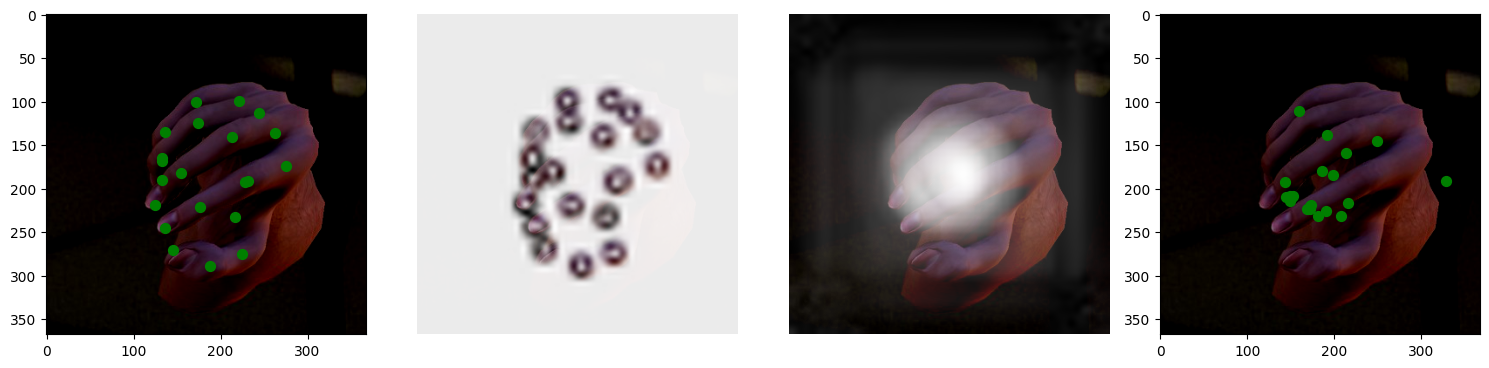

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(15,15))

index = np.random.randint(3000)

test_x, test_handpos, _ = load_img_and_pos_with_num(index)
test_y = create_heat_map(test_handpos)

test_x = normalize_data(test_x)

test_x = np.expand_dims(test_x, axis = 0)


y_pred, _ = model(test_x)

test_handpos = test_handpos.T
axes[0].imshow(test_x[0,:,:,::-1])
axes[0].scatter(test_handpos[0], test_handpos[1], color='green', s=50)
test_handpos = test_handpos.T

visualize_combined_map(test_x[0,:,:,::-1], test_y, axes[1])
visualize_combined_map(test_x[0,:,:,::-1], y_pred[0, :, :, :-1], axes[2])

pred_handpose = get_points_from_map(y_pred[0].numpy())
pred_handpose = pred_handpose.T
axes[3].imshow(test_x[0,:,:,::-1])
axes[3].scatter(pred_handpose[0], pred_handpose[1], color='green', s=50)
pred_handpose = pred_handpose.T


plt.tight_layout()
plt.show()

In [ ]:
dummy_input = tf.random.normal((1, 368, 368, 3))
model1 = HandModel()
model1(dummy_input)
model1.load_weights("good progress models/vgg19_train_full_dataset2.h5")
model2 = HandModel()
model2(dummy_input)
model2.load_weights("good progress models/vgg19_train_full_dataset4.h5")

In [ ]:
fig, axes = plt.subplots(4, 11, figsize=(15,15))

index = np.random.randint(3000)

test_x, test_handpos, _ = load_img_and_pos_with_num(index)
test_y = create_heat_map(test_handpos)

test_x = np.expand_dims(test_x, axis = 0)

y_pred1, _ = model1(test_x)
y_pred2, _ = model2(test_x)


for i, ax in enumerate(list(axes.flat)):
    if i%2 == 0:
        ax.imshow(y_pred1[0, :, :, i//2], cmap='gray')
    else:
        ax.imshow(y_pred2[0, :, :, i//2], cmap='gray')
    
    ax.axis('off')


plt.tight_layout()
plt.show()

In [11]:
import cv2 as cv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4882353..0.5].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4882353..0.5].


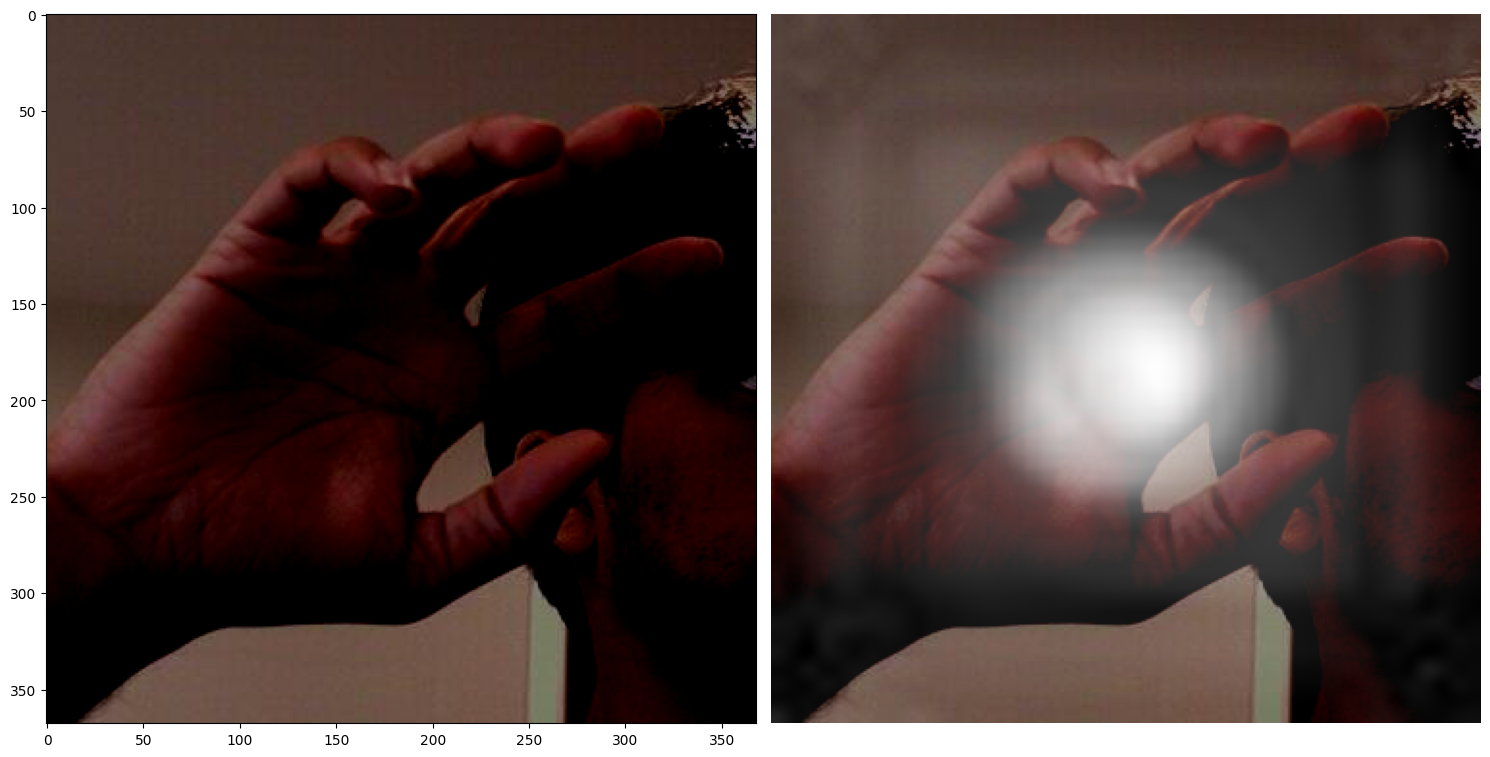

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,15))

img_path = "test_photo.jpeg"

test_x = cv.imread(img_path)
test_x = normalize_data(test_x)

test_x = np.expand_dims(test_x, axis = 0)

y_pred, _ = model(test_x)

axes[0].imshow(test_x[0, :, :, ::-1])

visualize_combined_map(test_x[0, :, :, ::-1], y_pred[0, :, :, :-1], axes[1])


plt.tight_layout()
plt.show()

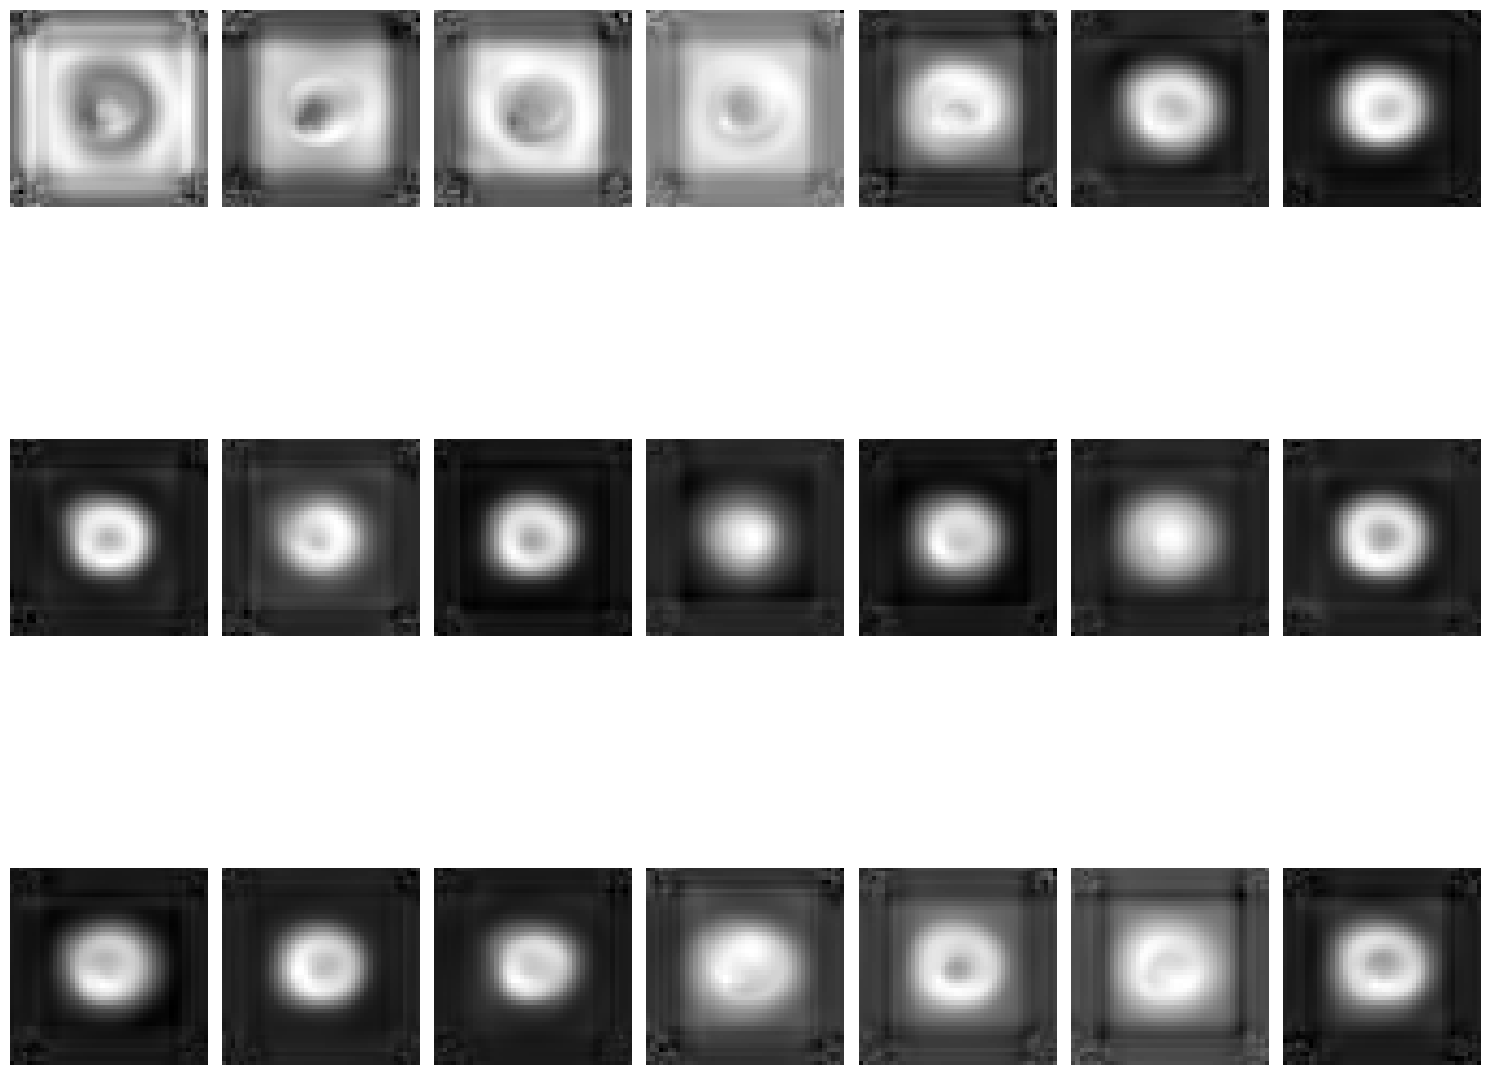

In [13]:
fig, axes = plt.subplots(3, 7, figsize=(15,15))

for i, ax in enumerate(list(axes.flat)):
    ax.imshow(y_pred[0, :, :, i], cmap='gray')
    
    ax.axis('off')


plt.tight_layout()
plt.show()